In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv')[['Survived','Age','Fare','SibSp','Parch']]
df

,Survived,Age,Fare,SibSp,Parch
0,0,22.0,7.2500,1,0
1,1,38.0,71.2833,1,0
2,1,26.0,7.9250,0,0
3,1,35.0,53.1000,1,0
4,0,35.0,8.0500,0,0
...,...,...,...,...,...
886,0,27.0,13.0000,0,0
887,1,19.0,30.0000,0,0
888,0,NaN,23.4500,1,2
889,1,26.0,30.0000,0,0


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
SibSp         0
Parch         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
SibSp       0
Parch       0
dtype: int64

In [13]:
df['family'] = df['SibSp'] + df['Parch']
df.sample()

,Survived,Age,Fare,SibSp,Parch,family
587,1,60.0,79.2,1,1,2


In [15]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [17]:
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [92]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],
                                                 df.Survived,
                                                 test_size=0.2,
                                                 random_state=0)

In [21]:
X_train.head()

,Age,Fare,family
387,36.0,13.0000,0
685,25.0,41.5792,3
20,35.0,26.0000,0
331,45.5,28.5000,0
396,31.0,7.8542,0


In [23]:
from sklearn.preprocessing import KBinsDiscretizer

In [71]:
def plotDiscritizeTransform(s):
    trf = ColumnTransformer([
        ('kbins1',KBinsDiscretizer(n_bins=10,strategy=s,encode="ordinal"),[0]),
        ('kbins2',KBinsDiscretizer(n_bins=10,strategy=s,encode="ordinal"),[1])
    ],remainder='passthrough')
    X_train_trf = trf.fit_transform(X_train)
    X_test_trf = trf.transform(X_test)

    plt.figure(figsize=(20,12))
    plt.subplot(221)
    plt.hist(X_train['Age'])
    plt.title('Before')
    
    plt.subplot(222)
    plt.hist(X_train_trf[:,0],color='red')
    plt.title('After')

    plt.subplot(223)
    plt.hist(X_train['Fare'])
    plt.title('Before')
    
    plt.subplot(224)
    plt.hist(X_train_trf[:,1],color='red')
    plt.title('After')
    plt.show()

    


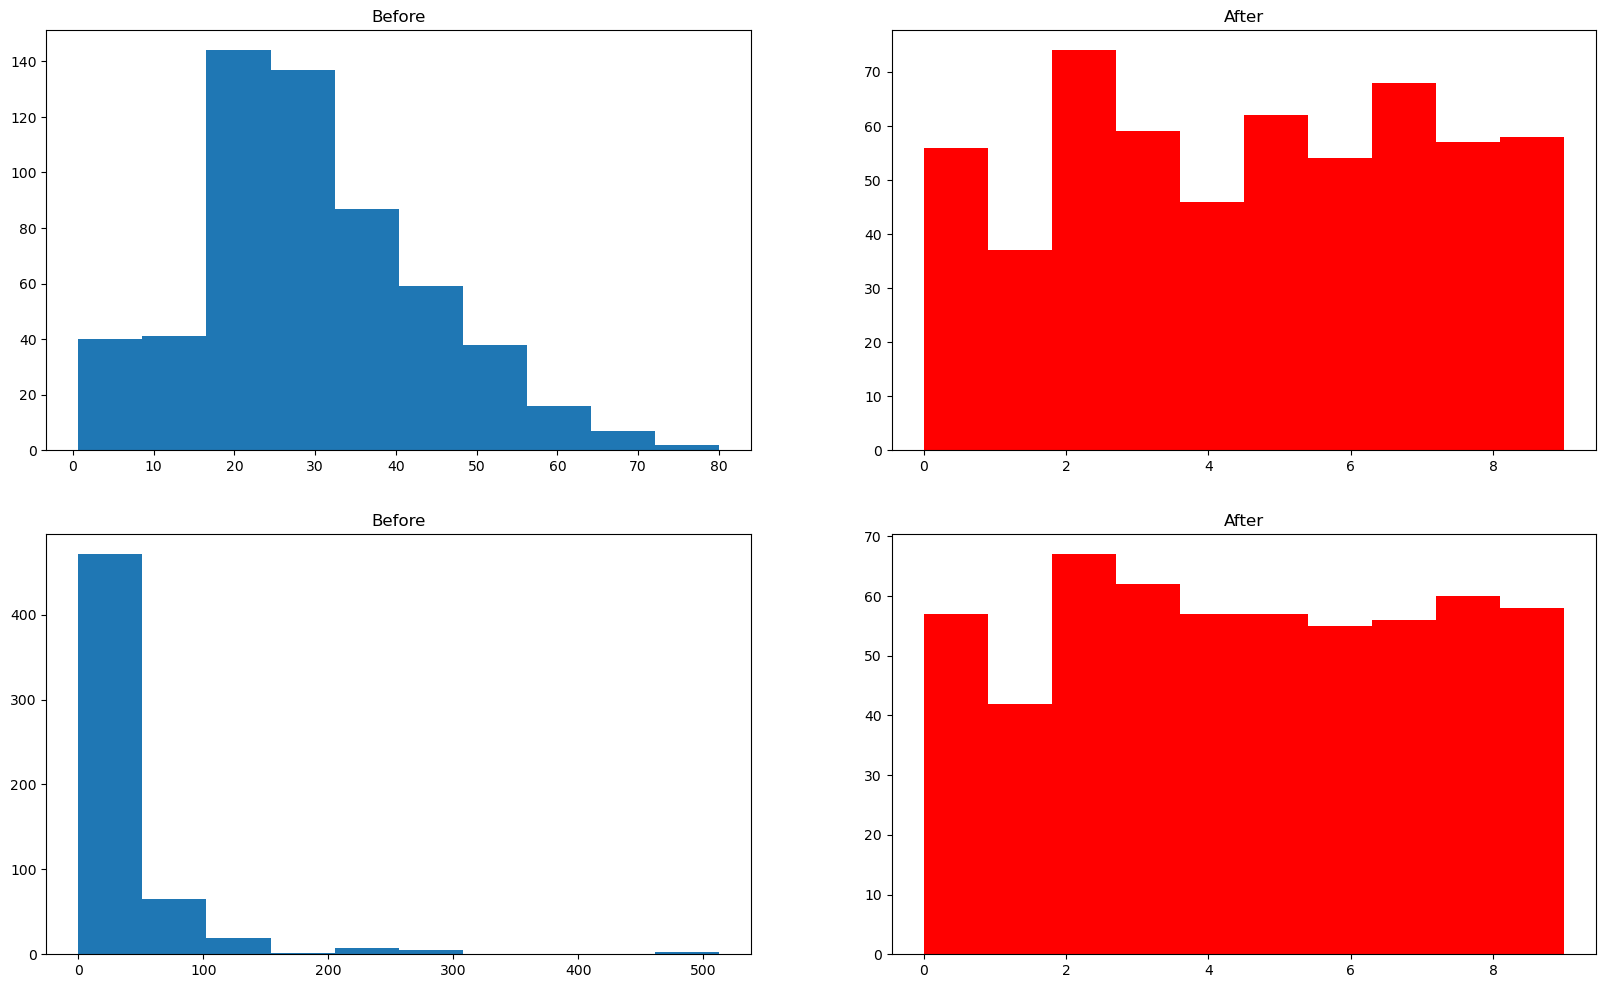

In [73]:
plotDiscritizeTransform('quantile')

In [130]:
def AccuracyScore():
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

In [132]:
AccuracyScore()

0.6013986013986014
0.6499608763693271


In [206]:
def DiscritizeAccuracyScore(b_age,b_fare,s_age,s_fare):
    trf = ColumnTransformer([
        ('kbins1',KBinsDiscretizer(strategy=s_age,n_bins=b_age,encode='ordinal'),[0]),
        ('kbins2',KBinsDiscretizer(strategy=s_fare,n_bins=b_fare,encode='ordinal'),[1])
    ],remainder='passthrough')

    X_train_trf = trf.fit_transform(X_train)
    X_test_trf = trf.transform(X_test)
    X_trf = trf.transform(X)
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train_trf,y_train)

    y_pred = clf.predict(X_test_trf)
    print(accuracy_score(y_pred,y_test))
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy')))

    

In [260]:
DiscritizeAccuracyScore(20,20,'quantile','uniform')

0.6503496503496503
0.7032276995305164


C:\Users\aashi\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
